# Importing dependencies
We used the following libraries in the first task:
- `pandas` to manipulate the data
- `scikit-learn` for imputing and scaling the data
- `seaborn` and `matplotlib` for visualization.

In [3]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data exploration
Let's load the training dataset from the corresponding .csv file.
Since we know that the columns represent the mean/standard deviation of the positions and angles of the 60 points, respectively, followed by the label name and code, let us rename the columns accordingly to allow for easier reading.

In [86]:
def load_data():
  training_data = pd.read_csv('train-final.csv', header=None)
  test_data = pd.read_csv('test-final.csv', header=None)

  name_mappings = {
      # Feature columns
      **{i:f'positions_mean_{i}' for i in range(60)},
      **{i:f'positions_std_{i}' for i in range(60, 120)},
      **{i:f'angles_mean_{i}' for i in range(120, 180)},
      **{i:f'angles_std_{i}' for i in range(180, 240)},
      # Label columns
      **{240: 'label_name', 241: 'label_code'},
  }

  training_data.rename(name_mappings, axis=1, inplace=True)
  training_feature_columns = training_data.columns[:-2]

  training_features = training_data[training_feature_columns]
  training_labels = training_data.label_name
  training_label_codes = training_data.label_code

  test_data.rename(name_mappings, axis=1, inplace=True)
  test_feature_columns = test_data.columns[:-2]

  test_features = test_data[test_feature_columns]
  test_labels = test_data.label_name
  test_label_codes = test_data.label_code

  return training_features, training_labels, training_label_codes, test_features, test_labels, test_label_codes


training_features, training_labels, training_label_codes, test_features, test_labels, test_label_codes = load_data()

Let's show some of the data

In [5]:
print("Data set number of rows:", training_features.shape[0])
print("Data set number of features:", training_features.shape[1])
training_features.head()

Data set number of rows: 540
Data set number of features: 240


,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.403147,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.458585,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.556154,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.458485,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.498700,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550


In [6]:
test_features.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.332255,0.672471,2.450465,-0.323645,0.486062,2.526748,-0.483695,0.370296,2.534973,-0.172186,...,0.348333,0.426959,0.604953,0.464157,0.751404,0.467516,0.306133,0.521694,0.546094,0.439480
1,-0.089784,0.656778,2.431880,-0.079363,0.467939,2.429239,-0.193909,0.349866,2.329680,0.081013,...,0.482754,0.456633,0.596048,0.461552,0.557319,0.373754,0.515013,0.413323,0.491261,0.530069
2,-0.427810,0.699557,2.347763,-0.444873,0.530140,2.433568,-0.610365,0.402565,2.398841,-0.264254,...,0.582908,0.412314,0.777705,0.318174,0.532617,0.476989,0.487606,0.604556,0.489667,0.433812
3,-0.089790,0.694279,2.428455,-0.072881,0.520537,2.496676,-0.255747,0.404209,2.520148,0.115363,...,0.409941,0.328799,0.551472,0.498960,0.313094,0.450005,0.581886,0.409794,0.377352,0.578679
4,-0.387741,0.540410,2.399926,-0.406310,0.361768,2.459448,-0.576004,0.262814,2.457772,-0.256852,...,0.348730,0.311284,0.684091,0.457543,0.446787,0.499285,0.512345,0.366741,0.468337,0.526775


How many different labels do we have in the training dataset?

In [7]:
number_of_classes = training_labels.nunique()
number_of_classes

30

Now let's take a look at how many occurrences we have of each label.

<AxesSubplot: >

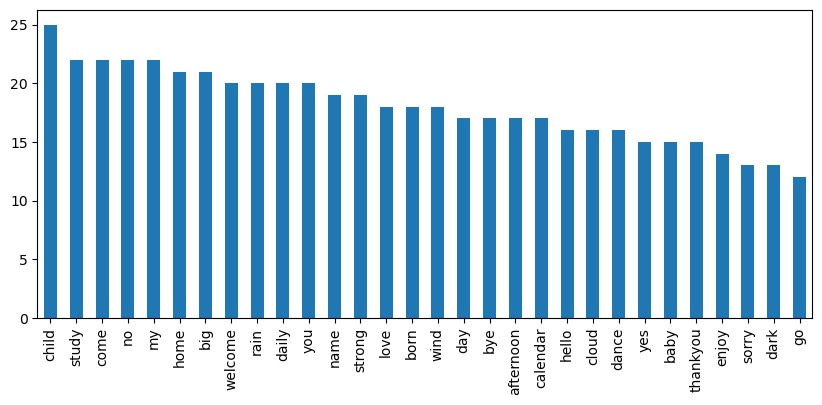

In [8]:
training_labels.value_counts().plot(kind='bar', figsize=(10, 4))

We can see that `child` is the most common label in the training dataset and that `go` is the least common label.

Now let's look for columns that have missing values. The missing values are in the following columns (along with the missing value count):


In [9]:
# Look for columns that have missing values
columns_null_sum = training_features.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

print(
    "Total amount of missing values in the dataframe:", 
    training_features.isnull().sum().sum()
)
print(
    "Missing values in the following column indexes (and missing value count):"
)
print(columns_with_nulls)


Total amount of missing values in the dataframe: 21
Missing values in the following column indexes (and missing value count):
positions_mean_7     4
positions_mean_8     4
positions_mean_9     4
positions_mean_14    3
positions_mean_15    3
positions_mean_16    3
dtype: int64


Some classifiers are more sensitive to the range, mean & outliers of the features, such as linear regression models, for example.
In order to be able to train a wide range of classifiers and compare them, we will need to preprocess the data for scaling and outlier treatment.

Let's see if the dataset also contains outliers. There are quite a few way to detect outliers (Source:
[Outlier detection methods in Scikit-Learn](https://scikit-learn.org/stable/modules/outlier_detection.html)):
- Isolation forest
- Local outlier factor
- One-class support vector machine (SVM)
- Elliptic envelope

We start by doing a boxplot for all features to get a visual indication of the outlier situation.

([<matplotlib.axis.XTick at 0x140962580>], [Text(1, 0, '')])

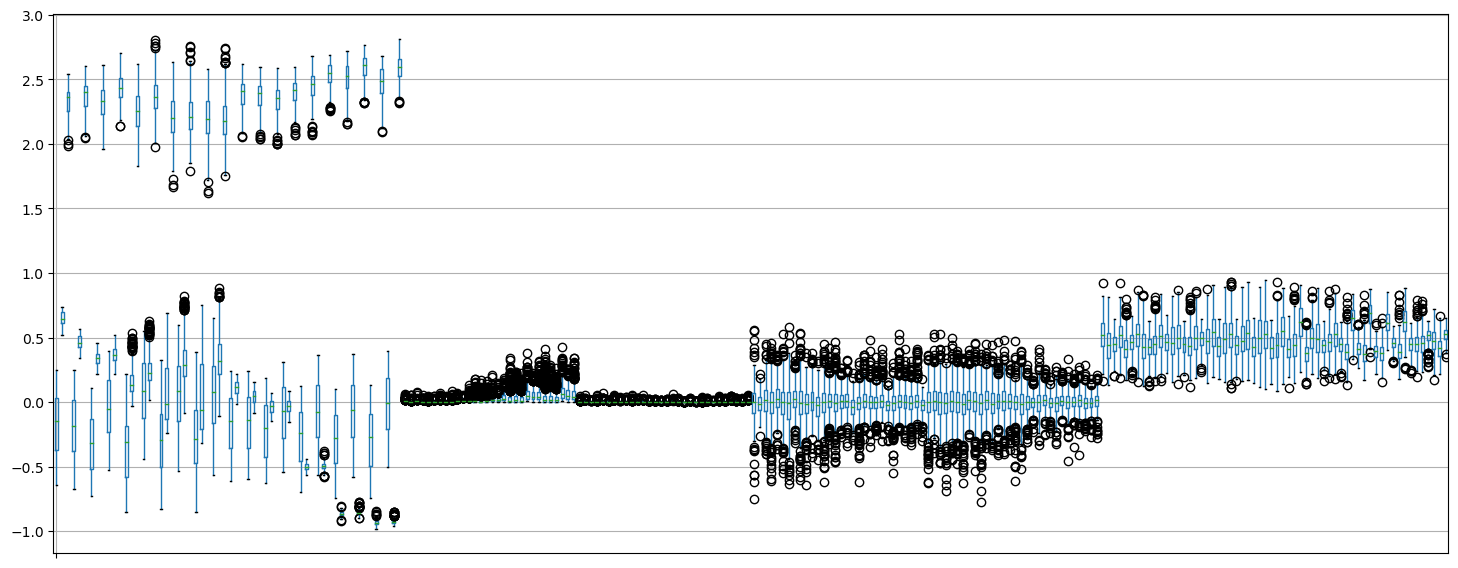

In [10]:
training_features.boxplot(figsize=(18,7))
plt.xticks([1], [''])

Based on the boxplot, there appears to be many columns with outliers. Many classifiers, e.g. linear classifiers like Logistic Regression will not handle outliers well, so we need to find a way to handle also outliers.

# Methods

## Outliers

As we saw in the boxplot above, there are many columns with outliers. And while there are many methods to detect outliers,let's begin with just identifying the values that are farthest from the mean. 

A simple approach is to identify the values that lie outside of 3$\sigma$ (that is, three times the standard deviation) as outliers, and drop the rows that have at least one outlier. Let's give it a try.

In [11]:
#training_features_outliers_marked = training_features[abs(training_features) <= 3]
from scipy import stats

training_features_outliers_marked = training_features[
    np.abs(stats.zscore(training_features.fillna(training_features.mean()))) < 3
]

In [12]:
training_features_outliers_marked.head()

,positions_mean_0,positions_mean_1,positions_mean_2,positions_mean_3,positions_mean_4,positions_mean_5,positions_mean_6,positions_mean_7,positions_mean_8,positions_mean_9,...,angles_std_230,angles_std_231,angles_std_232,angles_std_233,angles_std_234,angles_std_235,angles_std_236,angles_std_237,angles_std_238,angles_std_239
0,-0.479730,0.726079,2.403713,-0.481913,0.540689,2.455865,-0.646274,0.406351,2.428461,-0.312905,...,0.403147,0.422235,0.730551,0.367526,0.520040,0.493564,0.485049,0.477886,0.607874,0.441320
1,0.051888,0.646871,2.409750,0.060117,0.451912,2.449198,-0.106647,0.344324,2.461468,0.183852,...,0.458585,0.365385,0.428723,0.571661,0.431776,0.279627,0.595978,0.389501,0.241849,0.617291
2,-0.002692,0.624926,2.240212,0.018586,0.435987,2.269613,-0.152985,0.336314,2.305371,0.164105,...,0.556154,0.449078,0.537268,0.488480,0.540547,0.542650,0.430114,0.542999,0.454954,0.479623
3,-0.029336,0.664426,2.443440,-0.023426,0.480809,2.451577,-0.203417,0.353489,2.506273,0.119183,...,0.458485,0.420331,0.713397,0.387092,0.439498,0.417769,0.554555,0.498407,0.565789,0.455313
4,0.065604,0.639172,2.377587,0.069247,0.447377,2.405972,-0.092707,0.339007,2.368022,0.231172,...,0.498700,0.280299,0.671461,0.475014,0.401192,0.372539,0.578720,0.446630,0.580236,0.460550


Number of rows left 250


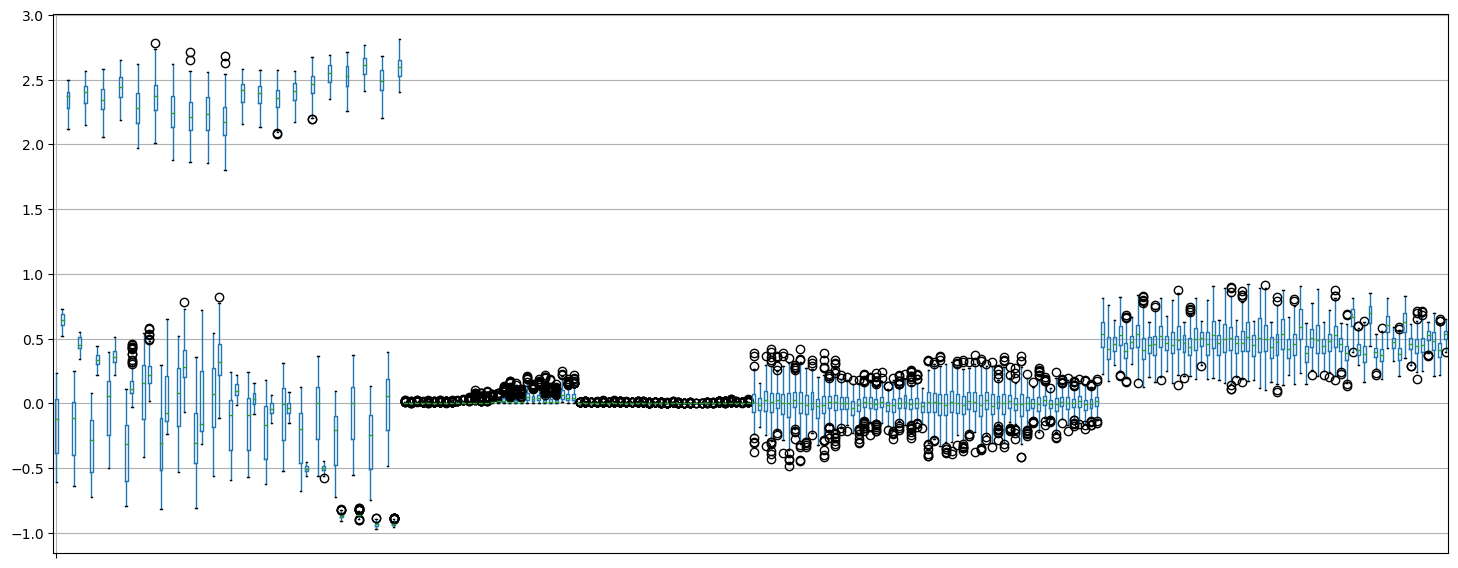

In [13]:
training_features_outliers_removed = training_features_outliers_marked.dropna()
training_features_outliers_removed.boxplot(figsize=(18,7))
plt.xticks([1], [''])
print("Number of rows left", training_features_outliers_removed.shape[0])

The boxplot now looks better, except for the second part (columns 60 to 120), which is `positions_std_i`.
We can also see that if we remove all the rows with at least one detected outlier, we are left with less than half of the original data! This is due to the large number of features.

We need another method for this dataset, let's instead cap the outliers to 3 sigma.

In [14]:
def pipeline_outliers(df, std_cap=3):
  df = df.copy()

  for column in df.columns:

    mean = df[column].mean(skipna = True)
    std = df[column].std(skipna = True)
    
    df[column] = np.clip(df[column], -(mean + std_cap*std), mean + std_cap*std)

  return df

([<matplotlib.axis.XTick at 0x1646ad400>], [Text(1, 0, '')])

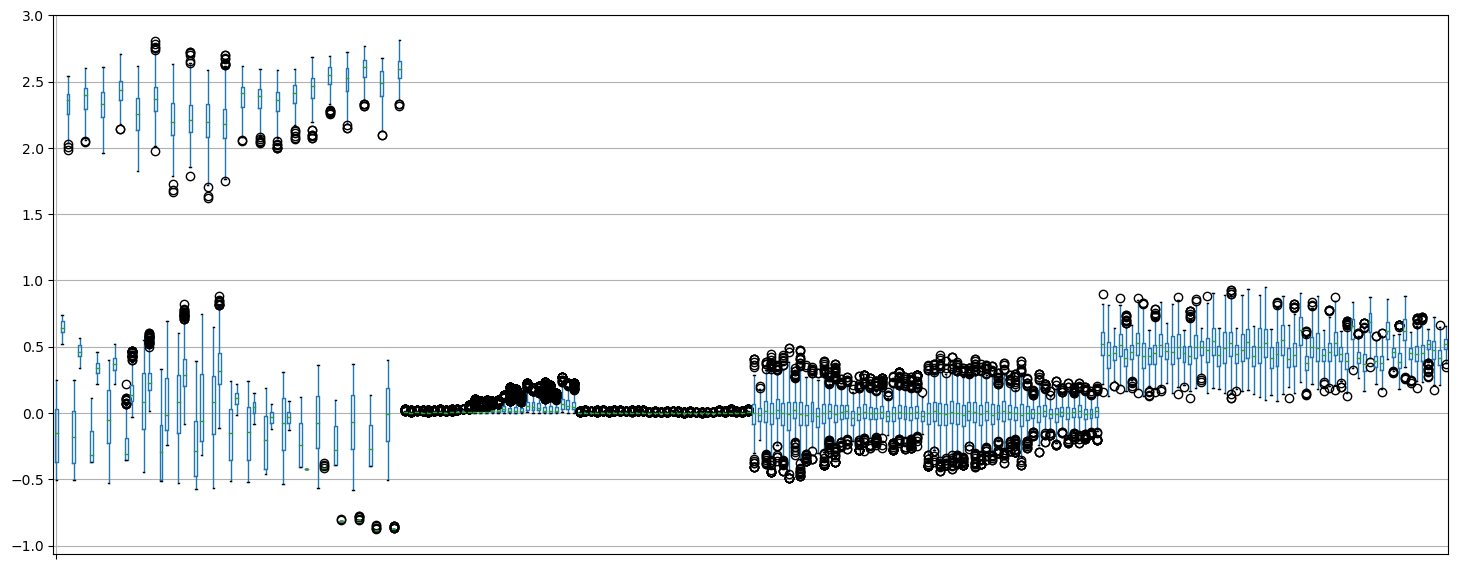

In [15]:
df = pipeline_outliers(training_features)
df.boxplot(figsize=(18,7))
plt.xticks([1], [''])

## Missing data

As we saw above, there are 6 columns that have missing values (3 or 4 missing values each). Many classifiers do not handle missing values directly, such as Logistic Regression and SVM, for example. As such we need to find a way to manage the missing values.

There are many different ways of handling missing values and we will explore a few of them here. To get started, let's examine the features/columns that contain missing data. The two visualizations chosen for each of the features/columns are:

- *Histogram* - This will give a good indication of the distribution, for example if it appears to be normal.
- *Boxplot* - We get some additional information from the boxplot showing the median, quartiles as well as outliers.

Let's plot the distributions for the columns with missing data:

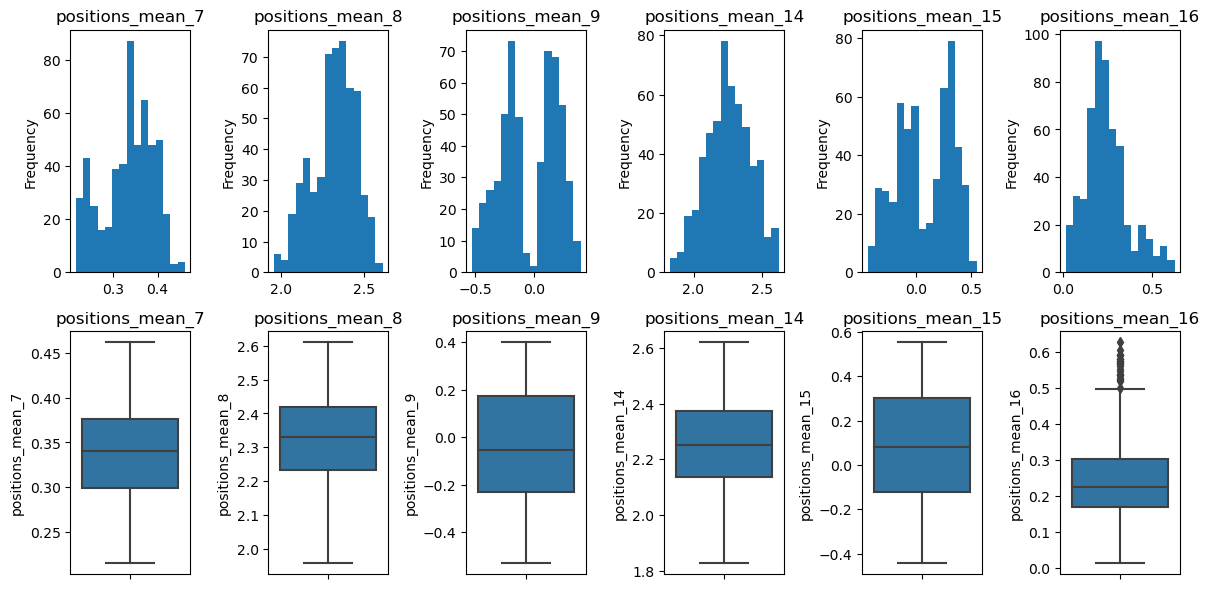

In [16]:
def plot_distributions_for_columns(dataframe, columns):
    # Plot distributions for each of the columns that have missing values
    figure, axes = plt.subplots(2, len(columns), figsize=(12, 6))

    for index, column in enumerate(columns):
        # plot a histogram of the column for the first row
        dataframe[column].plot(
            kind='hist', ax=axes[0, index], title=column, bins=15
        )
        # Do a box plot as well
        sns.boxplot(y=dataframe[column], ax=axes[1, index]).set_title(column)

    plt.tight_layout()


plot_distributions_for_columns(training_features, columns_with_nulls.index)

The distributions are quite different, which mean we may need different imputation techniques for each column.
For example, the columns `positions_mean_9` and `positions_mean_15` are clearly not normal distributions and replacing missing values with the mean would likely not be ideal.
For instance in the case of `positions_mean_9` the mean is close to 0 where few other samples are, moreover this feature may even need to be split into two separate features as it appears to be the combination of two gaussian distributions.

Also, we do not know if the missing values themselves have a significance, i.e. we might want to create a separate column to indicate that a missing value is present or not. There are relatively few rows that have missing values, though, that may limit the usefulness of this technique and usefulness will also depend on the classifier used in the end.

For now, we will implement support for the following imputation strategies:
- Replacing with **mean**
- **Drop the rows** containing at least one missing value
- **K-Nearest Neighbour (KNN)** imputation, i.e. use the mean value of the K nearest neighbours

In [17]:
from sklearn.impute import KNNImputer, SimpleImputer

def impute(dataframe, imputer_class, **kwargs):
    imputer = imputer_class(**kwargs)
    dataframe = dataframe.copy()
    dataframe[dataframe.columns] = imputer.fit_transform(dataframe.values)
    return dataframe

# KNN imputation
def impute_knn(dataframe):
    return impute(dataframe, KNNImputer, n_neighbors=2, weights='uniform')

# Drop rows
def impute_drop_rows(dataframe):
    return dataframe.dropna()

# Mean imputation
def impute_mean(dataframe):
    return impute(
        dataframe, SimpleImputer, missing_values=np.nan, strategy='mean'
    )


Let's compare the mean and KNN imputation methods.

In [18]:
columns_null_sum = training_features.isnull().sum()
columns_with_nulls = columns_null_sum[columns_null_sum > 0]

In [19]:
#training_features = training_data[training_feature_columns]
all_na_values = training_features.isna()

First let's execute both imputations individually.
Starting with the mean imputation, the imputed values are the following:

In [20]:
training_data_mean_imputed = impute_mean(training_features)
training_data_mean_imputed.values[all_na_values]

array([ 0.33458168,  2.31761983, -0.03841946,  0.33458168,  2.31761983,
       -0.03841946,  0.33458168,  2.31761983, -0.03841946,  0.33458168,
        2.31761983, -0.03841946,  2.25511306,  0.08066904,  0.24483198,
        2.25511306,  0.08066904,  0.24483198,  2.25511306,  0.08066904,
        0.24483198])

While the KNN-imputed values look like this:

In [21]:
training_data_knn_imputed = impute_knn(training_features)
training_data_knn_imputed.values[all_na_values]

array([ 0.34047311,  2.31943747,  0.28644774,  0.3482031 ,  2.39881444,
       -0.1273677 ,  0.35056898,  2.50631498,  0.39795417,  0.36853525,
        2.44980983, -0.2093955 ,  2.30348019,  0.1777522 ,  0.21750797,
        2.05630751,  0.31015251,  0.20072834,  2.31141073,  0.18122421,
        0.22825797])

### Comparison of mean and KNN
Now it is time to compare the results and visualize the differences on a histogram

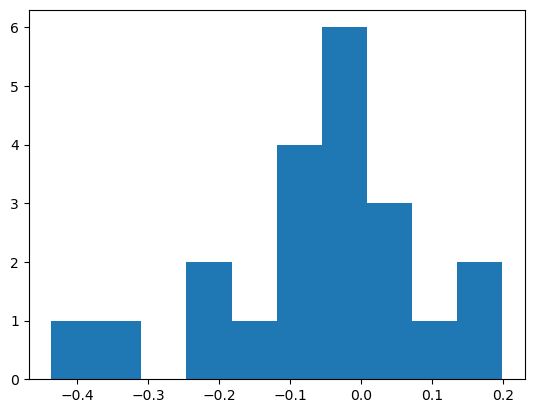

In [22]:
differences = (
    training_data_mean_imputed.values[all_na_values]
    - training_data_knn_imputed.values[all_na_values]
)
plt.hist(differences);

We can conclude that the differences between the methods are not significant, the mode is close to zero, for most of the missing values the two methods give very similar imputed values - more than half of the values are in the range [-0.1,0.1]

Now let's look at how the difference is distributed for each column using a boxplot and a swarm plot.


/var/folders/13/whd_fwjx0xq1811krrl7jzh40000gp/T/ipykernel_17000/1160409712.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90);


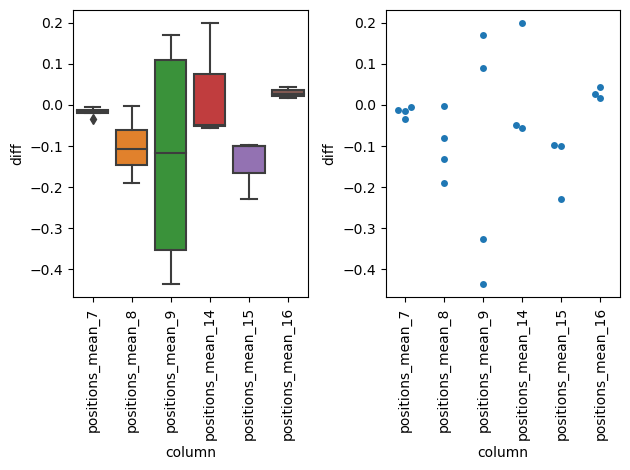

In [23]:
na_rows, na_columns = np.where(all_na_values)
dataframe_differences_columns = pd.DataFrame(
    {'diff': differences, 'column': training_features.columns[na_columns]}
)

fig, axs = plt.subplots(ncols=2)

axis = sns.boxplot(
    x='column', data=dataframe_differences_columns, y='diff', ax=axs[0]
)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90);

axis = sns.swarmplot(
    x='column', data=dataframe_differences_columns, y='diff', ax=axs[1]
)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90);

fig.tight_layout()

When comparing the imputed values between the 'mean' and 'KNN' approaches, we see that they produce very similar values for columns `positions_mean_7` and `positions_mean_16` but larger differences by varying degrees for the other columns. The largest (absolute) deviance is for `positions_mean_9`.


Based on this it is likely that we may need to employ different imputation techniques depending on the column/feature.

For now, however, let's use KNN imputation and make sure that after the imputation there are no more missing values in our dataset. We will bring these three different methods into Task 2 of the project.


In [24]:
# Let's create a pipeline function that uses the KNN imputation
def pipeline_missing_values(df, method = "knn"):
  df = df.copy()
  
  columns_null_sum = df.isnull().sum()
  columns_with_nulls = columns_null_sum[columns_null_sum > 0]

  if method == "knn":
    df[columns_with_nulls.index] = impute_knn(df[columns_with_nulls.index])
  elif method == "mean":
    df[columns_with_nulls.index] = impute_mean(df[columns_with_nulls.index])
  else:
    raise f"Unknown method {method}"

  assert df.isnull().sum().sum() == 0

  return df

## Scaling
First we will take a look at how the data looks by feature/column. While the dataset contains a lot of features, we can use a boxplot to get an overview understanding of how the different columns compare.

Let's make a boxplot for every feature to get an overview of how they all relate in terms of range & centre. No need to have labels for the feature names, we just want to show all of them in one plot.

([<matplotlib.axis.XTick at 0x150ffc460>], [Text(1, 0, '')])

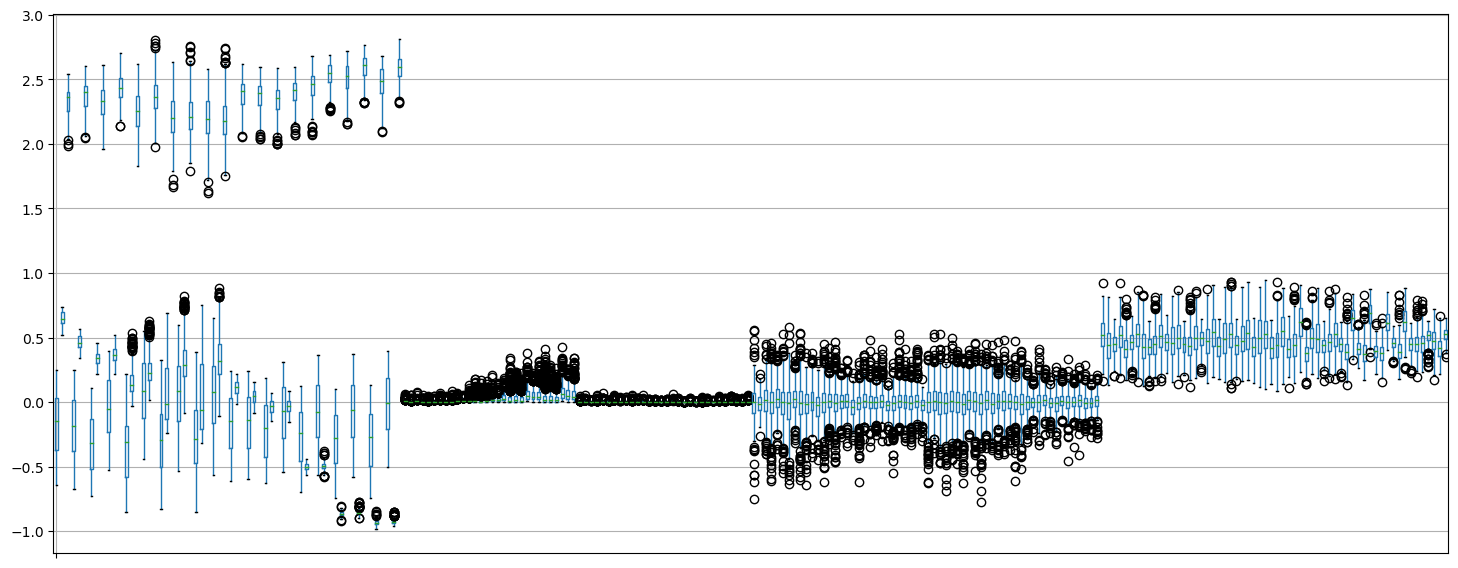

In [25]:
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

The columns are clearly not all scaled to the same range and they have different means. As such a scaler that centers the mean and normalizes (scale to the variance) may be suitable. Let's use scikit's `StandardScaler` for this.

The `StandardScaler`normalizes the data so that the mean becomes zero, and the variance one, i.e. the scaled dataset follows a *standard* normal distribution.

In [26]:
def pipeline_scale(dataframe):
    scaler = preprocessing.StandardScaler()
    scaled_values = scaler.fit_transform(dataframe.values)
    return pd.DataFrame(scaled_values)


training_features_scaled = pipeline_scale(training_features)
training_features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-1.323633,1.421746,0.733025,-1.232600,1.399904,0.822277,-1.422333,1.259873,0.852019,-1.153361,...,-0.970529,0.275952,1.047194,-1.135466,0.769486,0.395003,-0.513685,0.020178,2.181665,-1.544711
1,1.003039,0.078953,0.794440,1.093898,-0.102009,0.757567,0.931582,0.171022,1.105739,0.933965,...,0.047047,-0.367940,-1.823802,1.842487,-0.235120,-1.990480,1.426960,-0.876203,-2.053768,1.825020
2,0.764166,-0.293088,-0.930321,0.915639,-0.371414,-0.985672,0.729450,0.030405,-0.094153,0.850991,...,1.837917,0.579975,-0.791318,0.629031,1.002887,0.942327,-1.474741,0.680542,0.412169,-0.811236
3,0.647555,0.376563,1.137173,0.735317,0.386874,0.780659,0.509463,0.331900,1.450155,0.662231,...,0.045200,0.254384,0.884029,-0.850038,-0.147232,-0.450141,0.702284,0.228297,1.694685,-1.276755
4,1.063069,-0.051572,0.467238,1.133087,-0.178730,0.337967,0.992393,0.077691,0.387438,1.132799,...,0.783348,-1.331643,0.485131,0.432586,-0.583229,-0.954479,1.125046,-0.296817,1.861857,-1.176475


Looks good, i.e. the mean is about 0 and the standard deviation is around 1. All the columns have now been scaled. Let's rerun the boxplot.

([<matplotlib.axis.XTick at 0x1673abd90>], [Text(1, 0, '')])

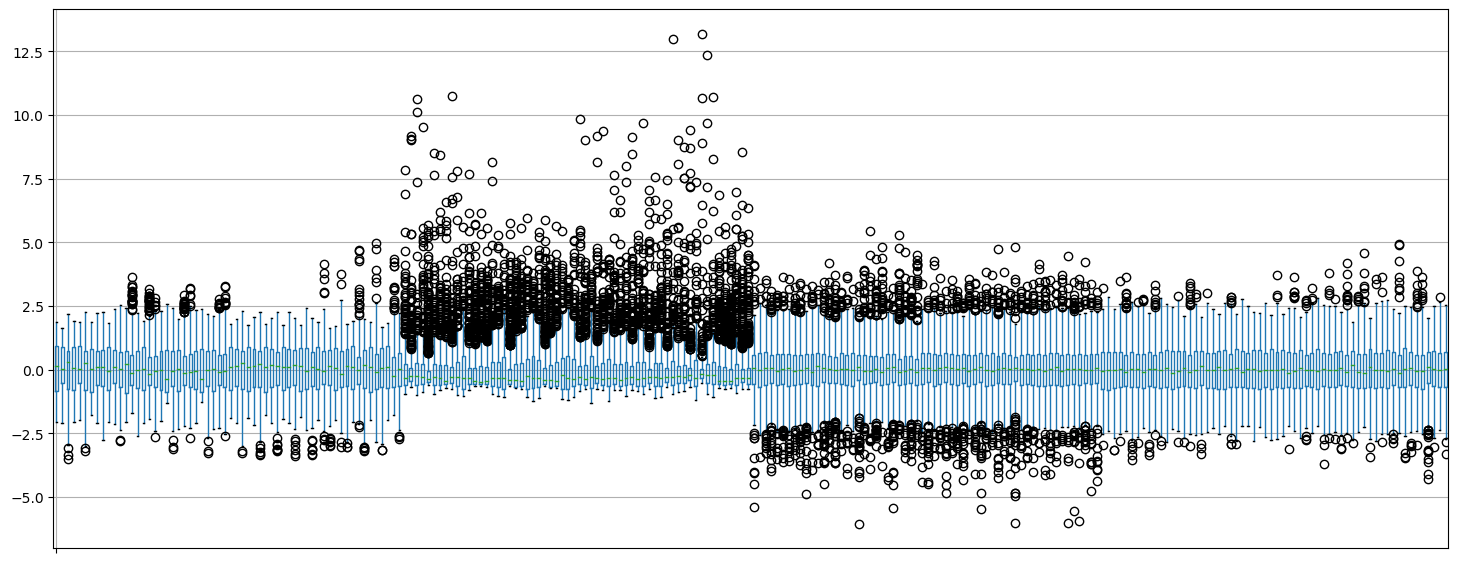

In [27]:
training_features_scaled.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

# Pipeline

In the Methods section above we have defined the pipeline methods needed for handling outliers, missing data and scaling. Let's put them all together.

([<matplotlib.axis.XTick at 0x1693e2850>], [Text(1, 0, '')])

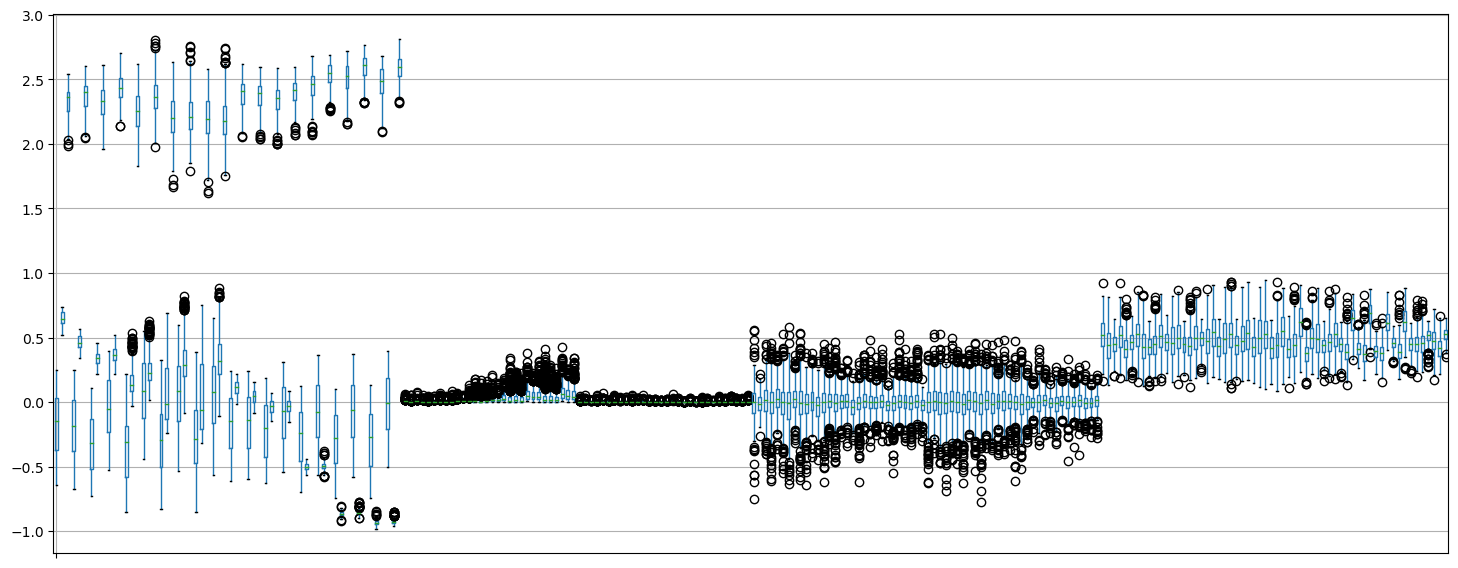

In [28]:
# Load the data
training_features, training_labels, test_features, test_labels = load_data()

# Plot before pipeline
training_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

([<matplotlib.axis.XTick at 0x168e4c2b0>], [Text(1, 0, '')])

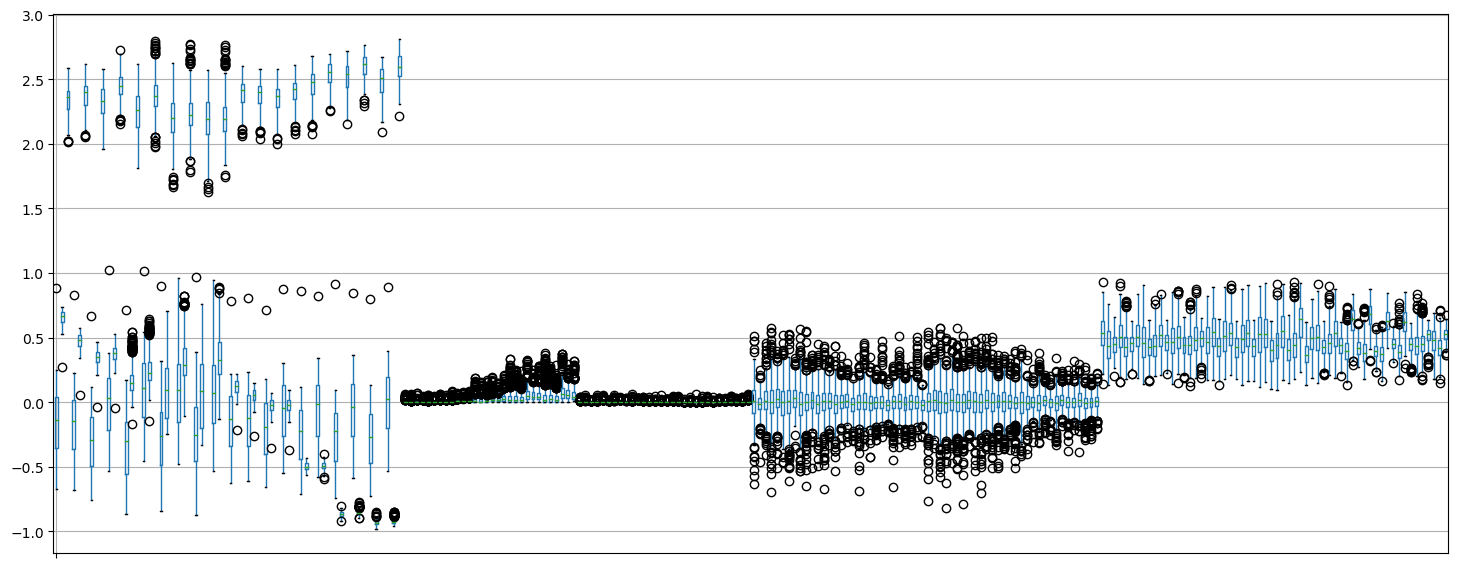

In [29]:
test_features.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

Run the pipeline and rerun the boxplot on the resulting dataset

([<matplotlib.axis.XTick at 0x17a7ffee0>], [Text(1, 0, '')])

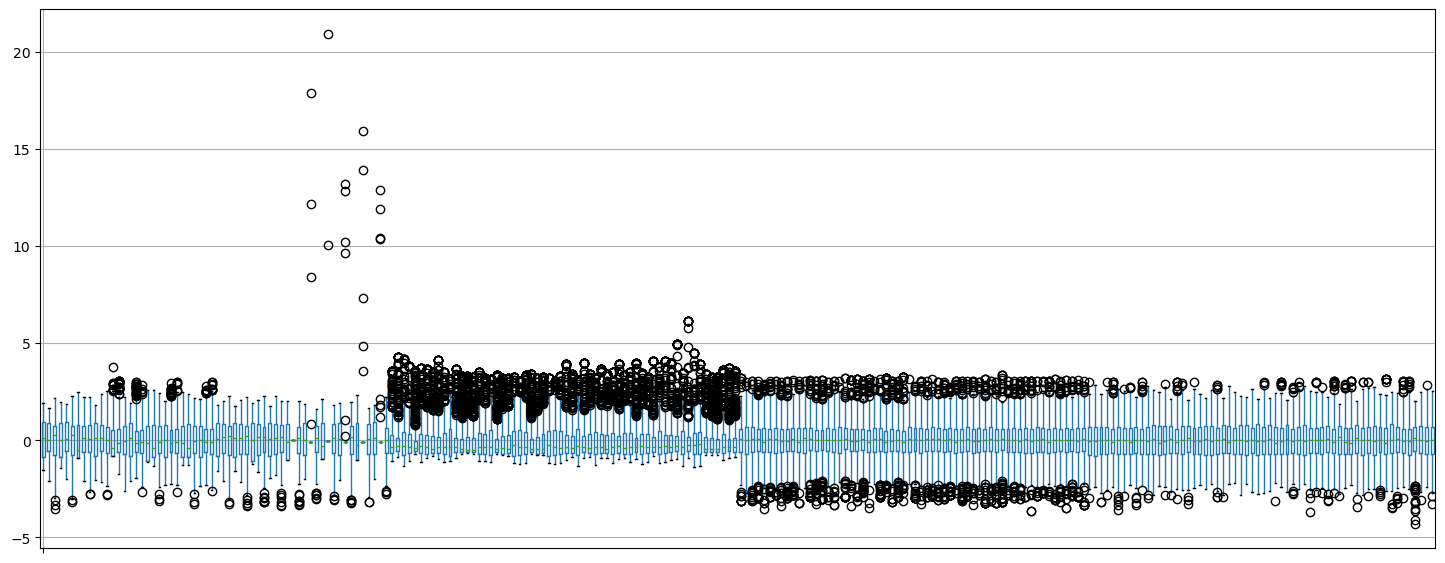

In [30]:
def run_data_pipeline(features, std_cap = 3, impute_method = "knn"):
  df = pipeline_outliers(features, std_cap=std_cap)
  df = pipeline_missing_values(df, method = impute_method)
  df = pipeline_scale(df)

  return df

train_df = run_data_pipeline(training_features)
train_df.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

([<matplotlib.axis.XTick at 0x17c6222b0>], [Text(1, 0, '')])

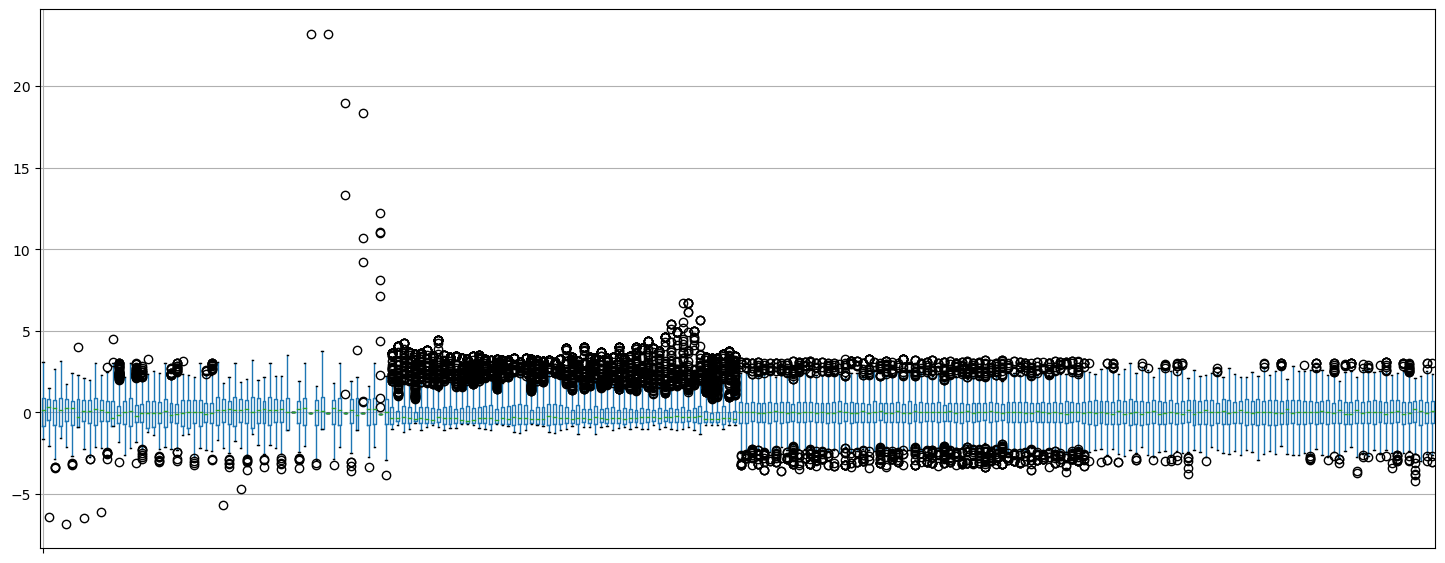

In [31]:
test_df = run_data_pipeline(test_features)

test_df.boxplot(figsize=(18, 7))
plt.xticks([1], [''])

# Training Models

The following observations have been made of the dataset and affects how models should be trained: 

- There are low number, less than 30, of samples per class. As such, overfitting will likely be a problem with more advanced classifiers like decision trees, for example. To address this, we will use a Cross Validation method to evaluate the fit. Furthermore, to ensure we have the same distribution in each fold of the CV, a stratified fold method will be used.
- The data set is very 'wide' - that is there are a very large amount of features (240) compared to the number of samples (540). To address this, a feature reduction will be used. There are many options for reducing features, such as removing features with strong correlation, low variable or fitting a classifier and removing those features that have low importance. Here we select the method of Recursive Feature Elimination.

## Feature reduction

In [60]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

train_df = run_data_pipeline(training_features, std_cap = 6, impute_method="mean")
#

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

def reduce(n_feats):

    rfe_selector = RFECV(estimator=svm.SVC(kernel = 'linear'), #svm.SVC(kernel = 'linear'), 
                        cv = StratifiedKFold(n_splits = 10), 
                        min_features_to_select = n_feats, step = 1, n_jobs=4)

    rfe_selector.fit(train_df, training_labels)

    selected_cols = train_df.columns[rfe_selector.get_support()]
    score = np.mean(rfe_selector.cv_results_["mean_test_score"])

    print(n_feats, len(selected_cols), score)

    return selected_cols, score

rfe_results = [reduce(n) for n in np.arange(12,13,1)]


12 40 0.8511402231926248


In [67]:
rfe_best_ix = np.argmin([score for _,score in rfe_results])
rfe_columns,_ = rfe_results[rfe_best_ix]

train_reduced_df = train_df[train_df.columns[rfe_columns]]

In [62]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pca = PCA()

pipe = Pipeline(steps=[("pca", pca), ("svm", svm.SVC(kernel="linear"))])
param_grid = {
    "pca__n_components": np.arange(10,100,5)
}
search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=4)
search.fit(train_df, training_labels)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.804):
{'pca__n_components': 85}


In [63]:
search.cv_results_["mean_test_score"]

array([0.46666667, 0.54444444, 0.62962963, 0.70185185, 0.74259259,
       0.7462963 , 0.75555556, 0.76481481, 0.7537037 , 0.77962963,
       0.77962963, 0.78518519, 0.78148148, 0.78518519, 0.79814815,
       0.8037037 , 0.8       , 0.80185185])

rfe_selector

In [138]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# import every avaliable classifier in sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_validate

classifiers = [
    #LogisticRegression(),
    #DecisionTreeClassifier(),
    #RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    MLPClassifier(),
    # use dummy classifier to get a baseline
    DummyClassifier(strategy="most_frequent")
]

# initialize a dataframe to store the results
all_results = []

scoring =["accuracy","precision_macro", "recall_macro", "f1_macro"]

for clf in classifiers:

    scores = cross_validate(clf, train_reduced_df, training_label_codes, scoring=scoring, cv=10, return_train_score = True)

    print(f"Classifier: {clf.__class__.__name__}", "test accuracy", np.mean(scores["test_accuracy"]))
    #print(scores)

    scores_mean = {a:np.mean(scores[a]) for a in scores.keys()}
    scores_mean["classifier"] = clf.__class__.__name__

    # save the evaluation results in a dataframe
    all_results.append(pd.DataFrame([scores_mean]))

pd.concat(all_results)

Classifier: SVC test accuracy 0.888888888888889
{'fit_time': 0.01941835880279541, 'score_time': 0.004032778739929199, 'test_accuracy': 0.888888888888889, 'train_accuracy': 0.9800411522633745, 'test_precision_macro': 0.8897777777777778, 'train_precision_macro': 0.9824157777155019, 'test_recall_macro': 0.8894444444444444, 'train_recall_macro': 0.9789321571244946, 'test_f1_macro': 0.8729285714285714, 'train_f1_macro': 0.9802002738643605, 'classifier': 'SVC'}
Classifier: KNeighborsClassifier test accuracy 0.7518518518518518
{'fit_time': 0.0006967782974243164, 'score_time': 0.0031269073486328127, 'test_accuracy': 0.7518518518518518, 'train_accuracy': 0.8794238683127572, 'test_precision_macro': 0.7646190476190476, 'train_precision_macro': 0.892275040796566, 'test_recall_macro': 0.7588888888888888, 'train_recall_macro': 0.8754321446963121, 'test_f1_macro': 0.7372354497354496, 'train_f1_macro': 0.8774605182733559, 'classifier': 'KNeighborsClassifier'}
Classifier: GaussianNB test accuracy 0.788

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.019418,0.004033,0.888889,0.980041,0.889778,0.982416,0.889444,0.978932,0.872929,0.980200,SVC
0,0.000697,0.003127,0.751852,0.879424,0.764619,0.892275,0.758889,0.875432,0.737235,0.877461,KNeighborsClassifier
0,0.001214,0.001545,0.788889,0.920370,0.783278,0.928666,0.798333,0.923613,0.769111,0.923389,GaussianNB
0,9.344516,0.003337,0.725926,1.000000,0.726754,1.000000,0.718333,1.000000,0.693479,1.000000,GradientBoostingClassifier
0,0.113339,0.003839,0.122222,0.135597,0.040288,0.073951,0.109444,0.120117,0.046571,0.062811,AdaBoostClassifier
0,0.073141,0.001965,0.774074,0.994650,0.768500,0.995125,0.776111,0.994784,0.745873,0.994796,BaggingClassifier
0,0.067426,0.005121,0.922222,1.000000,0.918889,1.000000,0.923889,1.000000,0.909381,1.000000,ExtraTreesClassifier
0,1.253870,0.001596,0.879630,1.000000,0.874444,1.000000,0.878333,1.000000,0.860095,1.000000,MLPClassifier
0,0.000186,0.000760,0.046296,0.046296,0.001543,0.001543,0.033333,0.033333,0.002945,0.002950,DummyClassifier


In [125]:
scores = cross_validate(svm.SVC(kernel="linear"), train_reduced_df, training_label_codes, scoring=["accuracy","precision_macro", "recall_macro", "f1_macro"], cv=5)
scores

{'fit_time': array([0.010144  , 0.01029301, 0.01053786, 0.00988197, 0.00994301]),
 'score_time': array([0.00310087, 0.00300002, 0.00336313, 0.0028851 , 0.00274897]),
 'test_accuracy': array([0.86111111, 0.84259259, 0.94444444, 0.85185185, 0.89814815]),
 'test_precision_macro': array([0.86103175, 0.85166667, 0.96      , 0.88388889, 0.88825397]),
 'test_recall_macro': array([0.85722222, 0.84333333, 0.94888889, 0.86777778, 0.90055556]),
 'test_f1_macro': array([0.84674603, 0.83952381, 0.94690476, 0.85207311, 0.88487975])}

In [137]:
pd.DataFrame([scores_mean])

,fit_time,score_time,test_accuracy,train_accuracy,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro,test_f1_macro,train_f1_macro,classifier
0,0.019147,0.0039,0.888889,0.980041,0.889778,0.982416,0.889444,0.978932,0.872929,0.9802,SVC


Random forest with default hyperparameters and the default preprocessing pipeline

Still random forest, but try using different preprocessing parameters (higher cap for outlier capping and mean as imputation method insetad)

At least with the default parameters for the Random Forest, we get slightly higher result on the test set by increasing the cap and changing to mean imputation.

By capping we are reducing the amount of information in the dataset, so it makes sense that a classifier that can make use of the outlier information could potentially perform better (or increase risks of overfitting as well).

Optimizing hyperparameters for random forest with GridSearchCV:

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 120, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [8, 16, 32]
# Minimum number of samples required to split a node
min_samples_split = [8, 16, 32]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

train_df = run_data_pipeline(training_features)
test_df = run_data_pipeline(test_features)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 360 different combinations, and use all available cores
rf_grid =  GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
# Fit the random search model
rf_grid.fit(train_df, training_labels)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [8, 16, 32],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [8, 16, 32],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=2)

In [ ]:
rf_grid.score(test_df, test_labels)
#rf_grid.best_params_

0.9055555555555556

In [ ]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

# import every avaliable classifier in sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

# import classifications metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

"\n{'bootstrap': True,\n 'max_depth': 8,\n 'max_features': 'sqrt',\n 'min_samples_leaf': 2,\n 'min_samples_split': 8,\n 'n_estimators': 90}\n"

Decision tree with default parameters:

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(train_df, training_labels)
test_scores_default['tree'] = decision_tree.score(test_df, test_labels)

print("Score for Decision Tree with default hyperparameters:")
print(f"Test Accuracy: {test_scores_default['tree']}")

Score for Decision Tree with default hyperparameters:
Test Accuracy: 0.65


MLP with default hyperparameters:

In [ ]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier()
MLP.fit(train_df, training_labels)
test_scores_default['MLP'] = MLP.score(test_df, test_labels)

print("Score for MLP with default hyperparameters:")
print(f"Test Accuracy: {test_scores_default['MLP']}")

Score for MLP with default hyperparameters:
Test Accuracy: 0.7666666666666667


SVM with default hyperparameters:

In [54]:
from sklearn import svm

svm_model = svm.SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
svm_model.fit(train_df, training_labels)
test_scores_default['SVM'] = svm_model.score(test_df, test_labels)

print("Score for SVM with default hyperparameters:")
print(f"Test Accuracy: {test_scores_default['SVM']}")

Score for SVM with default hyperparameters:
Test Accuracy: 0.8388888888888889


kNN with default hyperparameters:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(train_df, training_labels)
test_scores_default['kNN'] = kNN.score(test_df, test_labels)

print("Score for kNN with default hyperparameters:")
print(f"Test Accuracy: {test_scores_default['kNN']}")

Score for kNN with default hyperparameters:
Test Accuracy: 0.5351851851851852


In [ ]:
print("All scores with default hyperparameters:")
print(test_scores_default)

All scores with default hyperparameters:
{'RandomForest': 0.8944444444444445, 'tree': 0.65, 'SVM': 0.8314814814814815, 'MLP': 0.7666666666666667, 'kNN': 0.5351851851851852}
